# Neural Networks Coursework Assignment
## Multi-class Classification: CIFAR-10 Dataset
### Candidate No. 215921 
### Dr. Viktoriia Sharmanksa

# Data Loading and Visualisation

1. Import all necessary libraries, including the dataset

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation,BatchNormalization
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam, Adadelta, SGD, RMSprop
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras import regularizers
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.regularizers import l2,l1
# Dataset library
from keras.datasets import cifar10

2. Load the dataset as a tuple of numpy arrays

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# 50,000 training and 10,000 test, (32x32x3 for RGB images, 1 for labels being an integer 0-9)
# each label denotes one of 10 classes respectively (0-9) => airplane, automobile, bird, cat, deer, dog, frog,horse, ship, truck
print('Training images shape:',x_train.shape)
print('Training labels shape:',y_train.shape)
print('Test images shape:',x_test.shape)
print('Test labels shape:',y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
# Random data visualisation function that prints the labels as well.
def visualise_data(data,y_data):
    f, axarr = plt.subplots(2,2)

    img1 = np.random.randint(0, data.shape[0])
    axarr[0,0].imshow(data[img1])

    img2 = np.random.randint(0, data.shape[0])
    axarr[0,1].imshow(data[img2])

    img3 = np.random.randint(0, data.shape[0])
    axarr[1,0].imshow(data[img3])

    img4 = np.random.randint(0, data.shape[0])
    axarr[1,1].imshow(data[img4])

    # show the label of each image above it
    label1 = y_data[img1][0]
    axarr[0,0].title.set_text(label1)
    label2 = y_data[img2][0]
    axarr[0,1].title.set_text(label2)
    label3 = y_data[img3][0]
    axarr[1,0].title.set_text(label3)
    label4 = y_data[img4][0]
    axarr[1,1].title.set_text(label4)

    plt.tight_layout()

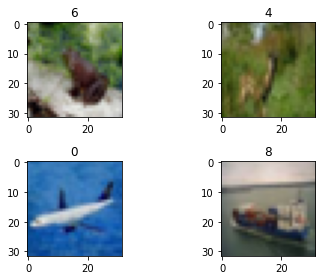

In [ ]:
# Visualise the training data
visualise_data(x_train,y_train)

# Data Preprocessing

3. Convert the image data to 32-bit precision and normalise it between 0-1

In [ ]:
x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32')/255.0

4. Convert the image data to grayscale

In [ ]:
xtrain_gray = []
for i in range(0,x_train_norm.shape[0]):
  xtrain_gray.append(cv2.cvtColor(x_train_norm[i],cv2.COLOR_BGR2GRAY))
xtrain_gray = np.array(xtrain_gray)
xtrain_gray.shape

(50000, 32, 32)

In [ ]:
xtest_gray = []
for i in range(0,x_test_norm.shape[0]):
  xtest_gray.append(cv2.cvtColor(x_test_norm[i],cv2.COLOR_BGR2GRAY))
xtest_gray = np.array(xtest_gray)
xtest_gray.shape

(10000, 32, 32)

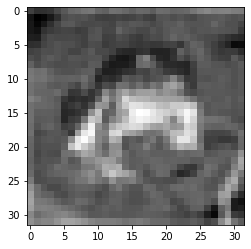

In [ ]:
plt.imshow(xtrain_gray[0],cmap='gray')

5. Apply one-hot encoding for the label data 

In [ ]:
enc_ytrain = to_categorical(y_train)
enc_ytest = to_categorical(y_test)

In [ ]:
y_train[0]

array([6], dtype=uint8)

It can be seen that the first element of ytrain has a label of 6. Thus, it is categorised at the 6th index as seen below.

In [ ]:
enc_ytrain[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Building the model

In [ ]:
def plot_acc_loss(hist,data_title=''):
    # loss plot 
    plt.figure(figsize=(16,5))
    plt.subplot(1, 2, 1)
    plt.suptitle(data_title, fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=16)
    plt.plot(hist.history['loss'], color='g', label='Training Loss')
    plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
    plt.legend(loc='upper right')

    # accuracy plot
    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=16)
    plt.plot(hist.history['accuracy'], color='g', label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

#### 1. Model without Batch Normalisation

In [ ]:
hist = History()

In [ ]:
input_shape = (32,32,1)
epochs = 200
batch_size = 128
classes = 10
xtrain_ = xtrain_gray.reshape(50000,32,32,1)

In [ ]:
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.3))

model1.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.4))

model1.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(classes, activation='softmax'))
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 264)         3

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model1.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 54s 33ms/step - loss: 2.2809 - accuracy: 0.1280 - categorical_accuracy: 0.1280 - val_loss: 2.1192 - val_accuracy: 0.2707 - val_categorical_accuracy: 0.2707
Epoch 2/100
274/274 [==============================] - 8s 29ms/step - loss: 2.0604 - accuracy: 0.2551 - categorical_accuracy: 0.2551 - val_loss: 1.9347 - val_accuracy: 0.3354 - val_categorical_accuracy: 0.3354
Epoch 3/100
274/274 [==============================] - 8s 29ms/step - loss: 1.9033 - accuracy: 0.3205 - categorical_accuracy: 0.3205 - val_loss: 1.7899 - val_accuracy: 0.3733 - val_categorical_accuracy: 0.3733
Epoch 4/100
274/274 [==============================] - 8s 29ms/step - loss: 1.7766 - accuracy: 0.3652 - categorical_accuracy: 0.3652 - val_loss: 1.7152 - val_accuracy: 0.3873 - val_categorical_accuracy: 0.3873
Epoch 5/100
274/274 [==============================] - 8s 29ms/step - loss: 1.7118 - accuracy: 0.3920 - categorical_accuracy: 0.3920 - val_loss: 1.6536 - val_a

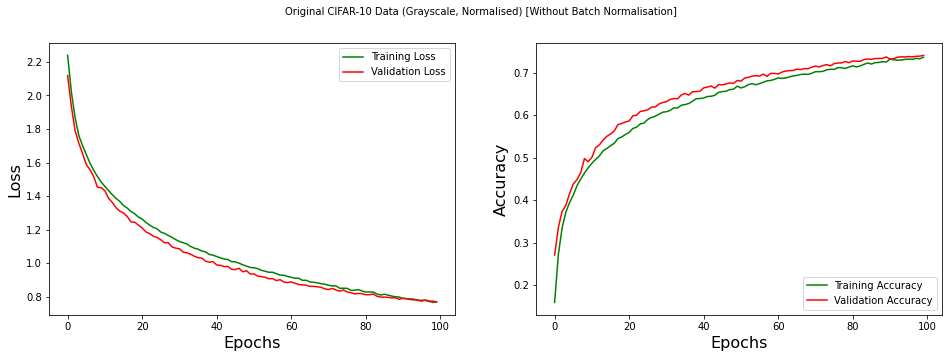

In [ ]:
plot_acc_loss(hist,'Original CIFAR-10 Data (Grayscale, Normalised) [Without Batch Normalisation]')

In [ ]:
hist2 = History()

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.3))

model2.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.4))

model2.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(classes, activation='softmax'))
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist2 = model2.fit(xtrain_, enc_ytrain,batch_size=batch_size,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 14s 35ms/step - loss: 3.6916 - accuracy: 0.1938 - categorical_accuracy: 0.1938 - val_loss: 2.8838 - val_accuracy: 0.0979 - val_categorical_accuracy: 0.0979
Epoch 2/100
274/274 [==============================] - 9s 33ms/step - loss: 2.6804 - accuracy: 0.2945 - categorical_accuracy: 0.2945 - val_loss: 2.2160 - val_accuracy: 0.2193 - val_categorical_accuracy: 0.2193
Epoch 3/100
274/274 [==============================] - 9s 33ms/step - loss: 2.3475 - accuracy: 0.3416 - categorical_accuracy: 0.3416 - val_loss: 1.6276 - val_accuracy: 0.4204 - val_categorical_accuracy: 0.4204
Epoch 4/100
274/274 [==============================] - 9s 33ms/step - loss: 2.1542 - accuracy: 0.3742 - categorical_accuracy: 0.3742 - val_loss: 1.5445 - val_accuracy: 0.4562 - val_categorical_accuracy: 0.4562
Epoch 5/100
274/274 [==============================] - 9s 33ms/step - loss: 1.9932 - accuracy: 0.4068 - categorical_accuracy: 0.4068 - val_loss: 1.6747 - val_a

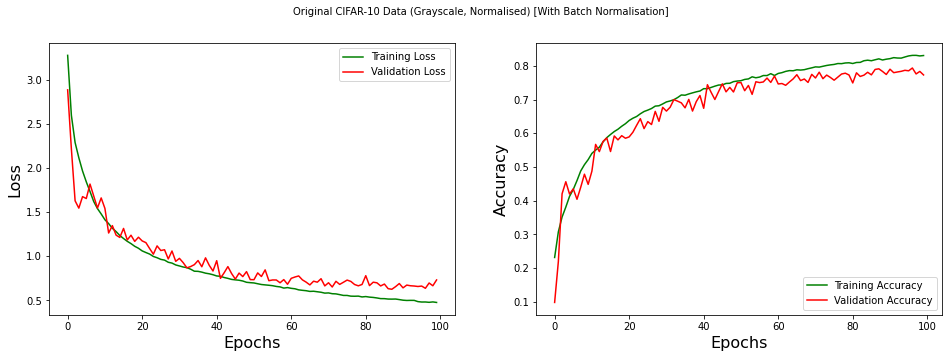

In [ ]:
plot_acc_loss(hist2,'Original CIFAR-10 Data (Grayscale, Normalised) [With Batch Normalisation]')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(xtrain_, enc_ytrain,shuffle=True)

In [ ]:
hist3 = History()

In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.4))

model3.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(classes, activation='softmax'))
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist3 = model3.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 3.0932 - accuracy: 0.2755 - categorical_accuracy: 0.2755 - val_loss: 4.9361 - val_accuracy: 0.0984 - val_categorical_accuracy: 0.0984
Epoch 2/100
274/274 [==============================] - 9s 33ms/step - loss: 1.7879 - accuracy: 0.4635 - categorical_accuracy: 0.4635 - val_loss: 2.0648 - val_accuracy: 0.3360 - val_categorical_accuracy: 0.3360
Epoch 3/100
274/274 [==============================] - 9s 33ms/step - loss: 1.4560 - accuracy: 0.5398 - categorical_accuracy: 0.5398 - val_loss: 1.2598 - val_accuracy: 0.5621 - val_categorical_accuracy: 0.5621
Epoch 4/100
274/274 [==============================] - 9s 33ms/step - loss: 1.2847 - accuracy: 0.5882 - categorical_accuracy: 0.5882 - val_loss: 1.0909 - val_accuracy: 0.6327 - val_categorical_accuracy: 0.6327
Epoch 5/100
274/274 [==============================] - 9s 33ms/step - loss: 1.1943 - accuracy: 0.6055 - categorical_accuracy: 0.6055 - val_loss: 1.1596 - val_a

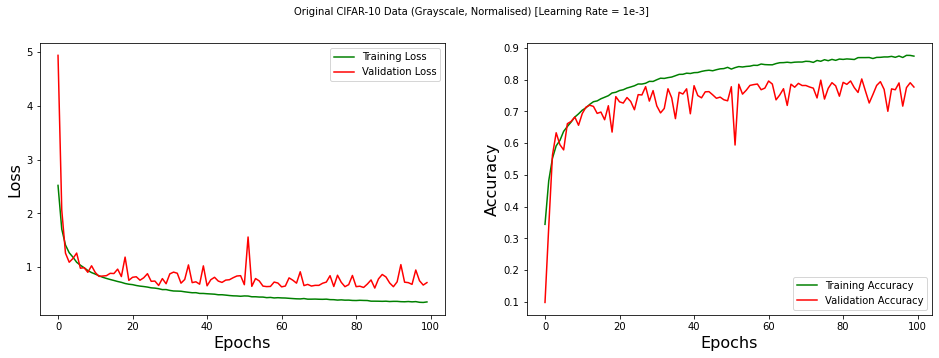

In [ ]:
plot_acc_loss(hist3,'Original CIFAR-10 Data (Grayscale, Normalised) [Learning Rate = 1e-3]')

In [ ]:
hist4 = History()

In [ ]:
model4 = Sequential()

model4.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.3))

model4.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.4))

model4.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(classes, activation='softmax'))
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-5), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist4 = model4.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 4.5998 - accuracy: 0.1178 - categorical_accuracy: 0.1178 - val_loss: 2.4126 - val_accuracy: 0.1009 - val_categorical_accuracy: 0.1009
Epoch 2/100
274/274 [==============================] - 9s 33ms/step - loss: 3.8783 - accuracy: 0.1653 - categorical_accuracy: 0.1653 - val_loss: 2.3257 - val_accuracy: 0.1956 - val_categorical_accuracy: 0.1956
Epoch 3/100
274/274 [==============================] - 9s 33ms/step - loss: 3.6010 - accuracy: 0.1948 - categorical_accuracy: 0.1948 - val_loss: 2.0794 - val_accuracy: 0.2778 - val_categorical_accuracy: 0.2778
Epoch 4/100
274/274 [==============================] - 9s 33ms/step - loss: 3.4326 - accuracy: 0.2099 - categorical_accuracy: 0.2099 - val_loss: 1.9893 - val_accuracy: 0.3080 - val_categorical_accuracy: 0.3080
Epoch 5/100
274/274 [==============================] - 9s 33ms/step - loss: 3.3064 - accuracy: 0.2245 - categorical_accuracy: 0.2245 - val_loss: 1.9568 - val_a

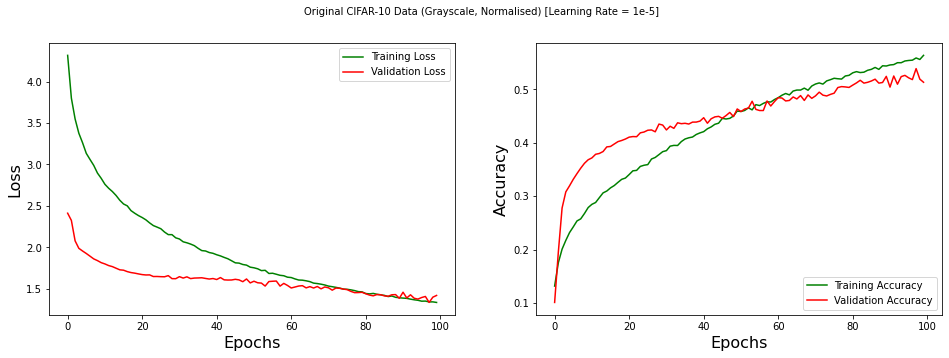

In [ ]:
plot_acc_loss(hist4,'Original CIFAR-10 Data (Grayscale, Normalised) [Learning Rate = 1e-5]')

In [ ]:
hist5 = History()
model5 = Sequential()

model5.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.3))

model5.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.4))

model5.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(classes, activation='softmax'))
print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-2), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist5 = model5.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 6.4896 - accuracy: 0.2361 - categorical_accuracy: 0.2361 - val_loss: 2.6383 - val_accuracy: 0.1404 - val_categorical_accuracy: 0.1404
Epoch 2/100
274/274 [==============================] - 9s 32ms/step - loss: 1.4556 - accuracy: 0.4844 - categorical_accuracy: 0.4844 - val_loss: 1.9089 - val_accuracy: 0.3471 - val_categorical_accuracy: 0.3471
Epoch 3/100
274/274 [==============================] - 9s 33ms/step - loss: 1.2462 - accuracy: 0.5637 - categorical_accuracy: 0.5637 - val_loss: 1.5082 - val_accuracy: 0.4750 - val_categorical_accuracy: 0.4750
Epoch 4/100
274/274 [==============================] - 9s 32ms/step - loss: 1.1395 - accuracy: 0.6020 - categorical_accuracy: 0.6020 - val_loss: 1.4044 - val_accuracy: 0.5157 - val_categorical_accuracy: 0.5157
Epoch 5/100
274/274 [==============================] - 9s 33ms/step - loss: 1.0726 - accuracy: 0.6258 - categorical_accuracy: 0.6258 - val_loss: 1.3521 - val_a

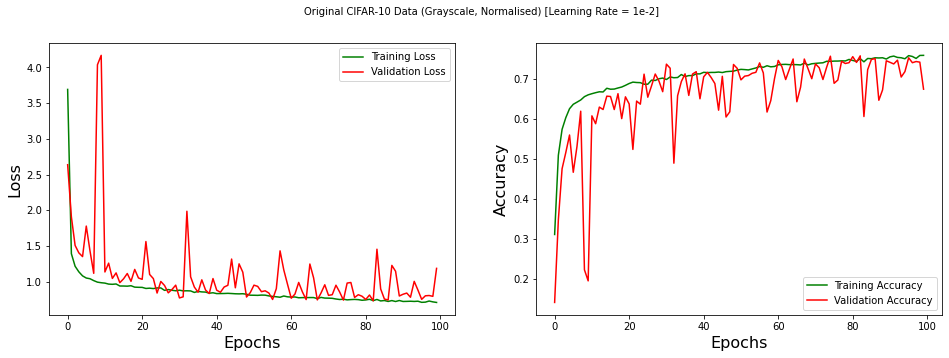

In [ ]:
plot_acc_loss(hist5,'Original CIFAR-10 Data (Grayscale, Normalised) [Learning Rate = 1e-2]')

In [ ]:
hist6 = History()
model6 = Sequential()

model6.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.4))

model6.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.5))

model6.add(Flatten())
model6.add(Dense(classes, activation='softmax'))
print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model6.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist6 = model6.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 4.5855 - accuracy: 0.1200 - categorical_accuracy: 0.1200 - val_loss: 2.3837 - val_accuracy: 0.1291 - val_categorical_accuracy: 0.1291
Epoch 2/100
274/274 [==============================] - 9s 32ms/step - loss: 4.0491 - accuracy: 0.1536 - categorical_accuracy: 0.1536 - val_loss: 2.2381 - val_accuracy: 0.1953 - val_categorical_accuracy: 0.1953
Epoch 3/100
274/274 [==============================] - 9s 33ms/step - loss: 3.8488 - accuracy: 0.1757 - categorical_accuracy: 0.1757 - val_loss: 2.1072 - val_accuracy: 0.2652 - val_categorical_accuracy: 0.2652
Epoch 4/100
274/274 [==============================] - 9s 32ms/step - loss: 3.7418 - accuracy: 0.1866 - categorical_accuracy: 0.1866 - val_loss: 2.0556 - val_accuracy: 0.2982 - val_categorical_accuracy: 0.2982
Epoch 5/100
274/274 [==============================] - 9s 32ms/step - loss: 3.5900 - accuracy: 0.1988 - categorical_accuracy: 0.1988 - val_loss: 2.0289 - val_a

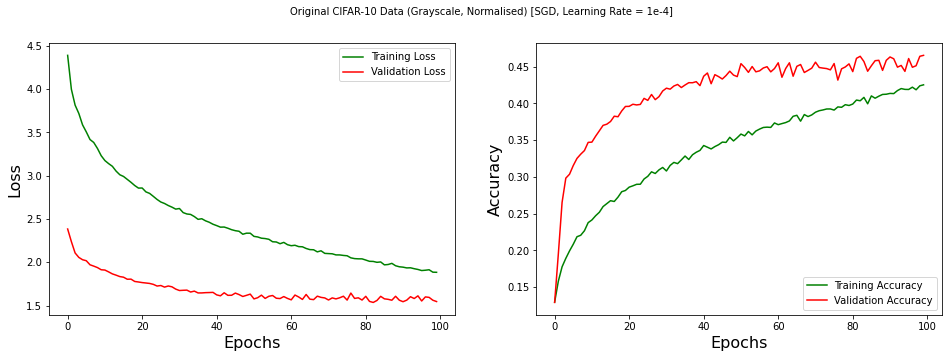

In [ ]:
plot_acc_loss(hist6,'Original CIFAR-10 Data (Grayscale, Normalised) [SGD, Learning Rate = 1e-4]')

In [ ]:
hist7 = History()
model7 = Sequential()

model7.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=2))
model7.add(Dropout(0.3))

model7.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=2))
model7.add(Dropout(0.4))

model7.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=2))
model7.add(Dropout(0.5))

model7.add(Flatten())
model7.add(Dense(classes, activation='softmax'))
print(model7.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model7.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1.0e-5), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist7 = model7.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 34ms/step - loss: 4.9433 - accuracy: 0.1072 - categorical_accuracy: 0.1072 - val_loss: 2.5034 - val_accuracy: 0.1079 - val_categorical_accuracy: 0.1079
Epoch 2/100
274/274 [==============================] - 9s 32ms/step - loss: 4.5984 - accuracy: 0.1135 - categorical_accuracy: 0.1135 - val_loss: 2.4391 - val_accuracy: 0.1157 - val_categorical_accuracy: 0.1157
Epoch 3/100
274/274 [==============================] - 9s 32ms/step - loss: 4.4701 - accuracy: 0.1177 - categorical_accuracy: 0.1177 - val_loss: 2.4270 - val_accuracy: 0.1370 - val_categorical_accuracy: 0.1370
Epoch 4/100
274/274 [==============================] - 9s 32ms/step - loss: 4.3757 - accuracy: 0.1228 - categorical_accuracy: 0.1228 - val_loss: 2.3992 - val_accuracy: 0.1494 - val_categorical_accuracy: 0.1494
Epoch 5/100
274/274 [==============================] - 9s 32ms/step - loss: 4.3597 - accuracy: 0.1238 - categorical_accuracy: 0.1238 - val_loss: 2.3589 - val_a

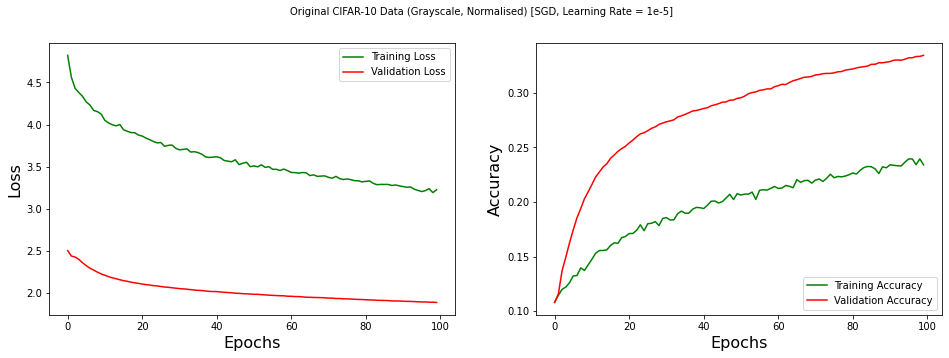

In [ ]:
plot_acc_loss(hist7,'Original CIFAR-10 Data (Grayscale, Normalised) [SGD, Learning Rate = 1e-5]')

In [ ]:
hist8 = History()
model8 = Sequential()

model8.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=2))
model8.add(Dropout(0.3))

model8.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=2))
model8.add(Dropout(0.4))

model8.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=2))
model8.add(Dropout(0.5))

model8.add(Flatten())
model8.add(Dense(classes, activation='softmax'))
print(model8.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model8.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist8 = model8.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 4.0247 - accuracy: 0.1589 - categorical_accuracy: 0.1589 - val_loss: 2.9309 - val_accuracy: 0.0984 - val_categorical_accuracy: 0.0984
Epoch 2/100
274/274 [==============================] - 9s 32ms/step - loss: 3.1656 - accuracy: 0.2385 - categorical_accuracy: 0.2385 - val_loss: 2.2095 - val_accuracy: 0.2291 - val_categorical_accuracy: 0.2291
Epoch 3/100
274/274 [==============================] - 9s 32ms/step - loss: 2.8055 - accuracy: 0.2872 - categorical_accuracy: 0.2872 - val_loss: 1.7180 - val_accuracy: 0.3837 - val_categorical_accuracy: 0.3837
Epoch 4/100
274/274 [==============================] - 9s 32ms/step - loss: 2.6264 - accuracy: 0.3098 - categorical_accuracy: 0.3098 - val_loss: 1.8011 - val_accuracy: 0.3788 - val_categorical_accuracy: 0.3788
Epoch 5/100
274/274 [==============================] - 9s 32ms/step - loss: 2.4319 - accuracy: 0.3340 - categorical_accuracy: 0.3340 - val_loss: 1.6327 - val_a

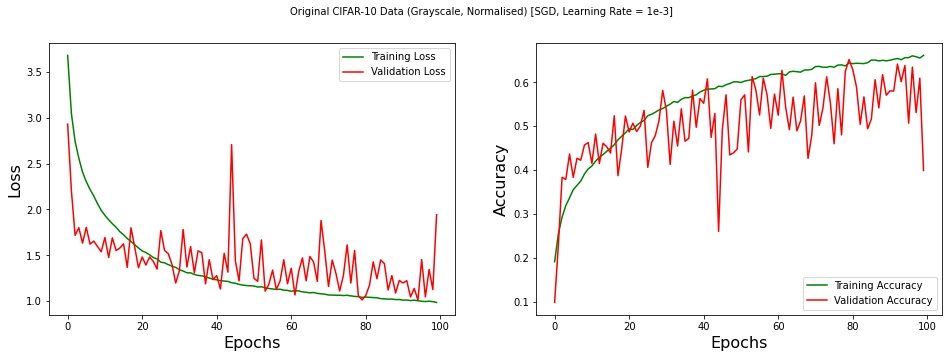

In [ ]:
plot_acc_loss(hist8,'Original CIFAR-10 Data (Grayscale, Normalised) [SGD, Learning Rate = 1e-3]')

In [ ]:
hist9 = History()
model9 = Sequential()

model9.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=2))
model9.add(Dropout(0.3))

model9.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=2))
model9.add(Dropout(0.4))

model9.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=2))
model9.add(Dropout(0.5))

model9.add(Flatten())
model9.add(Dense(classes, activation='softmax'))
print(model9.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model9.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1.0e-2), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist9 = model9.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 11s 35ms/step - loss: 3.8296 - accuracy: 0.2154 - categorical_accuracy: 0.2154 - val_loss: 3.3361 - val_accuracy: 0.0987 - val_categorical_accuracy: 0.0987
Epoch 2/100
274/274 [==============================] - 9s 32ms/step - loss: 2.4661 - accuracy: 0.3402 - categorical_accuracy: 0.3402 - val_loss: 2.2375 - val_accuracy: 0.2847 - val_categorical_accuracy: 0.2847
Epoch 3/100
274/274 [==============================] - 9s 32ms/step - loss: 2.0852 - accuracy: 0.3950 - categorical_accuracy: 0.3950 - val_loss: 1.6118 - val_accuracy: 0.4459 - val_categorical_accuracy: 0.4459
Epoch 4/100
274/274 [==============================] - 9s 32ms/step - loss: 1.8904 - accuracy: 0.4277 - categorical_accuracy: 0.4277 - val_loss: 1.9705 - val_accuracy: 0.3719 - val_categorical_accuracy: 0.3719
Epoch 5/100
274/274 [==============================] - 9s 32ms/step - loss: 1.7194 - accuracy: 0.4656 - categorical_accuracy: 0.4656 - val_loss: 1.9859 - val_a

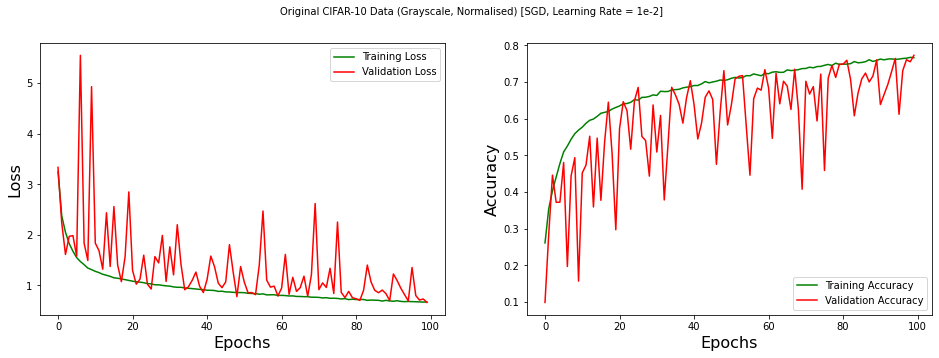

In [ ]:
plot_acc_loss(hist9,'Original CIFAR-10 Data (Grayscale, Normalised) [SGD, Learning Rate = 1e-2]')

In [ ]:
hist10 = History()
model10 = Sequential()

model10.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D(pool_size=2))
model10.add(Dropout(0.3))

model10.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D(pool_size=2))
model10.add(Dropout(0.4))

model10.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D(pool_size=2))
model10.add(Dropout(0.5))

model10.add(Flatten())
model10.add(Dense(classes, activation='softmax'))
print(model10.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model10.save('model.h5')

In [ ]:
model10.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1.0e-2), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist10 = model10.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 55s 22ms/step - loss: 11.1797 - accuracy: 0.2442 - categorical_accuracy: 0.2442 - val_loss: 4.3022 - val_accuracy: 0.1179 - val_categorical_accuracy: 0.1179
Epoch 2/100
274/274 [==============================] - 6s 21ms/step - loss: 1.5077 - accuracy: 0.4737 - categorical_accuracy: 0.4737 - val_loss: 1.4877 - val_accuracy: 0.4737 - val_categorical_accuracy: 0.4737
Epoch 3/100
274/274 [==============================] - 5s 19ms/step - loss: 1.3260 - accuracy: 0.5377 - categorical_accuracy: 0.5377 - val_loss: 1.4408 - val_accuracy: 0.5054 - val_categorical_accuracy: 0.5054
Epoch 4/100
274/274 [==============================] - 5s 19ms/step - loss: 1.2433 - accuracy: 0.5671 - categorical_accuracy: 0.5671 - val_loss: 1.6647 - val_accuracy: 0.4361 - val_categorical_accuracy: 0.4361
Epoch 5/100
274/274 [==============================] - 6s 21ms/step - loss: 1.2027 - accuracy: 0.5867 - categorical_accuracy: 0.5867 - val_loss: 1.6512 - val_

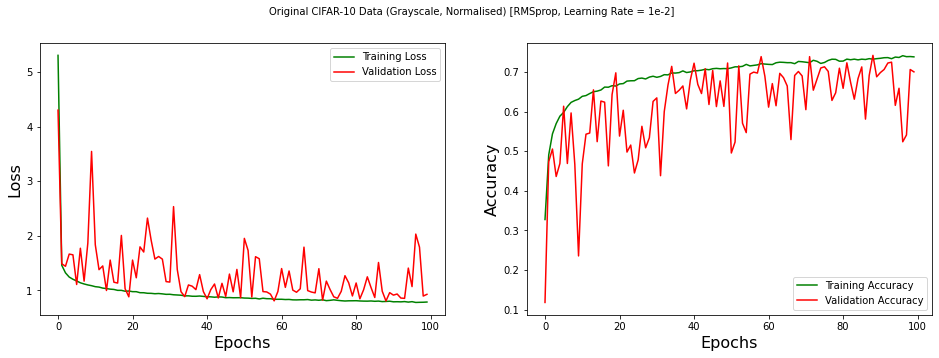

In [ ]:
plot_acc_loss(hist10,'Original CIFAR-10 Data (Grayscale, Normalised) [RMSprop, Learning Rate = 1e-2]')

In [ ]:
hist11 = History()
model11 = Sequential()

model11.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model11.add(BatchNormalization())
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.3))

model11.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model11.add(BatchNormalization())
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.4))

model11.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model11.add(BatchNormalization())
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.5))

model11.add(Flatten())
model11.add(Dense(classes, activation='softmax'))
print(model11.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model11.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist11 = model11.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 7s 19ms/step - loss: 3.4593 - accuracy: 0.2798 - categorical_accuracy: 0.2798 - val_loss: 5.0169 - val_accuracy: 0.1250 - val_categorical_accuracy: 0.1250
Epoch 2/100
274/274 [==============================] - 5s 20ms/step - loss: 1.8613 - accuracy: 0.4783 - categorical_accuracy: 0.4783 - val_loss: 3.6028 - val_accuracy: 0.2347 - val_categorical_accuracy: 0.2347
Epoch 3/100
274/274 [==============================] - 5s 18ms/step - loss: 1.4804 - accuracy: 0.5470 - categorical_accuracy: 0.5470 - val_loss: 3.3009 - val_accuracy: 0.2779 - val_categorical_accuracy: 0.2779
Epoch 4/100
274/274 [==============================] - 5s 18ms/step - loss: 1.3031 - accuracy: 0.5905 - categorical_accuracy: 0.5905 - val_loss: 2.3202 - val_accuracy: 0.4323 - val_categorical_accuracy: 0.4323
Epoch 5/100
274/274 [==============================] - 6s 20ms/step - loss: 1.1677 - accuracy: 0.6258 - categorical_accuracy: 0.6258 - val_loss: 1.6115 - val_ac

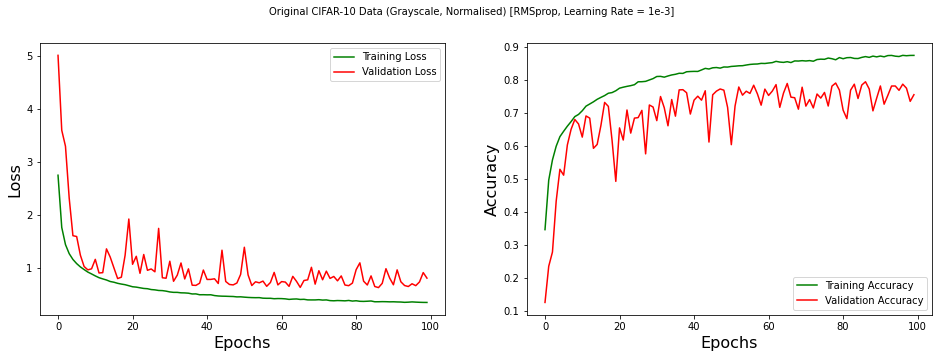

In [ ]:
plot_acc_loss(hist11,'Original CIFAR-10 Data (Grayscale, Normalised) [RMSprop, Learning Rate = 1e-3]')

In [ ]:
hist12 = History()
model12 = Sequential()

model12.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.3))

model12.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.4))

model12.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.5))

model12.add(Flatten())
model12.add(Dense(classes, activation='softmax'))
print(model12.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model12.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist12 = model12.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 8s 22ms/step - loss: 3.7576 - accuracy: 0.1879 - categorical_accuracy: 0.1879 - val_loss: 2.7167 - val_accuracy: 0.0989 - val_categorical_accuracy: 0.0989
Epoch 2/100
274/274 [==============================] - 6s 20ms/step - loss: 2.7077 - accuracy: 0.2909 - categorical_accuracy: 0.2909 - val_loss: 2.0717 - val_accuracy: 0.2436 - val_categorical_accuracy: 0.2436
Epoch 3/100
274/274 [==============================] - 6s 20ms/step - loss: 2.3201 - accuracy: 0.3514 - categorical_accuracy: 0.3514 - val_loss: 1.6644 - val_accuracy: 0.4111 - val_categorical_accuracy: 0.4111
Epoch 4/100
274/274 [==============================] - 5s 18ms/step - loss: 2.1081 - accuracy: 0.3832 - categorical_accuracy: 0.3832 - val_loss: 1.6307 - val_accuracy: 0.4433 - val_categorical_accuracy: 0.4433
Epoch 5/100
274/274 [==============================] - 5s 18ms/step - loss: 1.9423 - accuracy: 0.4157 - categorical_accuracy: 0.4157 - val_loss: 1.8228 - val_ac

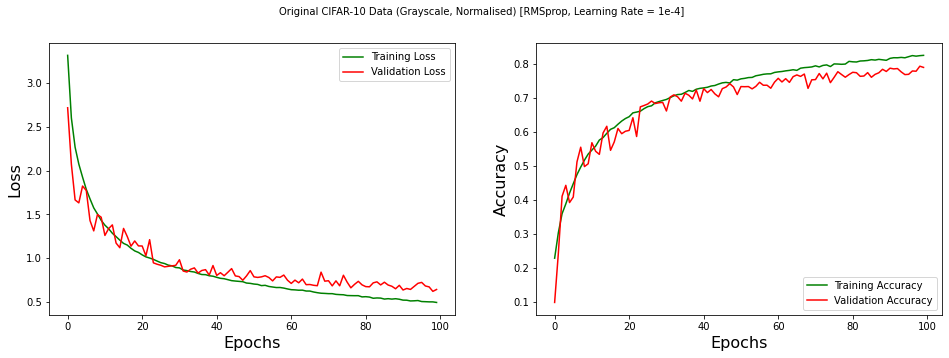

In [ ]:
plot_acc_loss(hist12,'Original CIFAR-10 Data (Grayscale, Normalised) [RMSprop, Learning Rate = 1e-4]')

In [ ]:
hist13 = History()
model13 = Sequential()

model13.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model13.add(BatchNormalization())
model13.add(MaxPooling2D(pool_size=2))
model13.add(Dropout(0.3))

model13.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model13.add(BatchNormalization())
model13.add(MaxPooling2D(pool_size=2))
model13.add(Dropout(0.4))

model13.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model13.add(BatchNormalization())
model13.add(MaxPooling2D(pool_size=2))
model13.add(Dropout(0.5))

model13.add(Flatten())
model13.add(Dense(classes, activation='softmax'))
print(model13.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model13.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1.0e-5), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist13 = model13.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 7s 22ms/step - loss: 4.3861 - accuracy: 0.1239 - categorical_accuracy: 0.1239 - val_loss: 2.5299 - val_accuracy: 0.0978 - val_categorical_accuracy: 0.0978
Epoch 2/100
274/274 [==============================] - 5s 17ms/step - loss: 3.7861 - accuracy: 0.1733 - categorical_accuracy: 0.1733 - val_loss: 2.3327 - val_accuracy: 0.1802 - val_categorical_accuracy: 0.1802
Epoch 3/100
274/274 [==============================] - 5s 18ms/step - loss: 3.5441 - accuracy: 0.1973 - categorical_accuracy: 0.1973 - val_loss: 1.9821 - val_accuracy: 0.2993 - val_categorical_accuracy: 0.2993
Epoch 4/100
274/274 [==============================] - 5s 18ms/step - loss: 3.3789 - accuracy: 0.2216 - categorical_accuracy: 0.2216 - val_loss: 1.9150 - val_accuracy: 0.3253 - val_categorical_accuracy: 0.3253
Epoch 5/100
274/274 [==============================] - 6s 20ms/step - loss: 3.2287 - accuracy: 0.2287 - categorical_accuracy: 0.2287 - val_loss: 1.8774 - val_ac

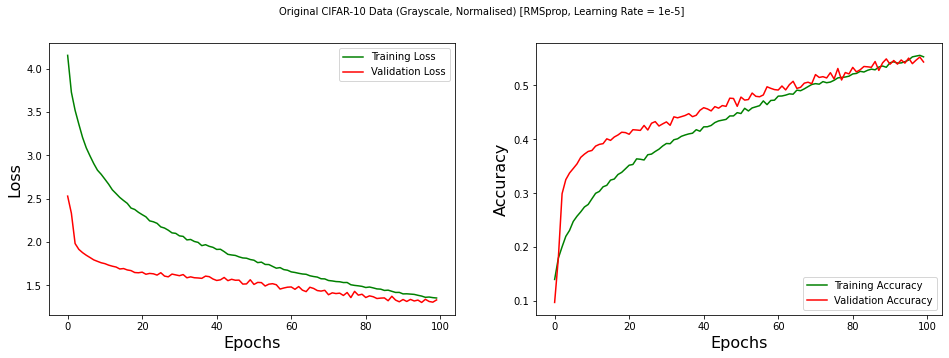

In [ ]:
plot_acc_loss(hist13,'Original CIFAR-10 Data (Grayscale, Normalised) [RMSprop, Learning Rate = 1e-5]')

In [ ]:
hist14 = History()
model14 = Sequential()

model14.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model14.add(BatchNormalization())
model14.add(MaxPooling2D(pool_size=2))
model14.add(Dropout(0.3))

model14.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model14.add(BatchNormalization())
model14.add(MaxPooling2D(pool_size=2))
model14.add(Dropout(0.4))

# model14.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
# model14.add(BatchNormalization())
# model14.add(MaxPooling2D(pool_size=2))
# model14.add(Dropout(0.5))

model14.add(Flatten())
model14.add(Dense(classes, activation='softmax'))
print(model14.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model14.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist14 = model14.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 52s 19ms/step - loss: 3.0163 - accuracy: 0.3044 - categorical_accuracy: 0.3044 - val_loss: 2.4668 - val_accuracy: 0.1321 - val_categorical_accuracy: 0.1321
Epoch 2/100
274/274 [==============================] - 4s 14ms/step - loss: 1.7739 - accuracy: 0.4743 - categorical_accuracy: 0.4743 - val_loss: 1.5093 - val_accuracy: 0.4780 - val_categorical_accuracy: 0.4780
Epoch 3/100
274/274 [==============================] - 4s 14ms/step - loss: 1.4634 - accuracy: 0.5414 - categorical_accuracy: 0.5414 - val_loss: 1.3528 - val_accuracy: 0.5561 - val_categorical_accuracy: 0.5561
Epoch 4/100
274/274 [==============================] - 4s 14ms/step - loss: 1.3224 - accuracy: 0.5750 - categorical_accuracy: 0.5750 - val_loss: 1.1312 - val_accuracy: 0.6208 - val_categorical_accuracy: 0.6208
Epoch 5/100
274/274 [==============================] - 4s 14ms/step - loss: 1.1970 - accuracy: 0.6059 - categorical_accuracy: 0.6059 - val_loss: 1.2826 - val_a

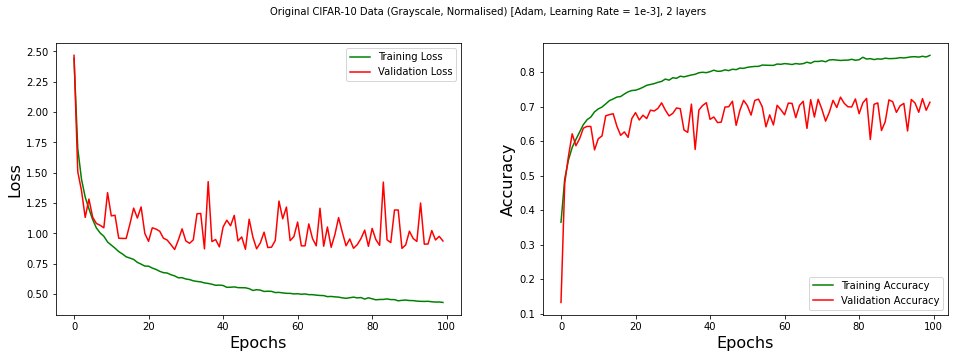

In [ ]:
plot_acc_loss(hist14,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3], 2 layers')

In [ ]:
hist15 = History()
model15 = Sequential()

model15.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model15.add(BatchNormalization())
model15.add(MaxPooling2D(pool_size=2))
model15.add(Dropout(0.3))

model15.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model15.add(BatchNormalization())
model15.add(MaxPooling2D(pool_size=2))
model15.add(Dropout(0.4))

# model14.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
# model14.add(BatchNormalization())
# model14.add(MaxPooling2D(pool_size=2))
# model14.add(Dropout(0.5))

model15.add(Flatten())
model15.add(Dense(classes, activation='softmax'))
print(model15.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model15.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist15 = model15.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 5s 16ms/step - loss: 3.3186 - accuracy: 0.2070 - categorical_accuracy: 0.2070 - val_loss: 2.2891 - val_accuracy: 0.1436 - val_categorical_accuracy: 0.1436
Epoch 2/100
274/274 [==============================] - 4s 14ms/step - loss: 2.3712 - accuracy: 0.3270 - categorical_accuracy: 0.3270 - val_loss: 1.6995 - val_accuracy: 0.4117 - val_categorical_accuracy: 0.4117
Epoch 3/100
274/274 [==============================] - 4s 14ms/step - loss: 2.0799 - accuracy: 0.3797 - categorical_accuracy: 0.3797 - val_loss: 1.4416 - val_accuracy: 0.5019 - val_categorical_accuracy: 0.5019
Epoch 4/100
274/274 [==============================] - 4s 14ms/step - loss: 1.9114 - accuracy: 0.4121 - categorical_accuracy: 0.4121 - val_loss: 1.3898 - val_accuracy: 0.5157 - val_categorical_accuracy: 0.5157
Epoch 5/100
274/274 [==============================] - 4s 14ms/step - loss: 1.7718 - accuracy: 0.4432 - categorical_accuracy: 0.4432 - val_loss: 1.3609 - val_ac

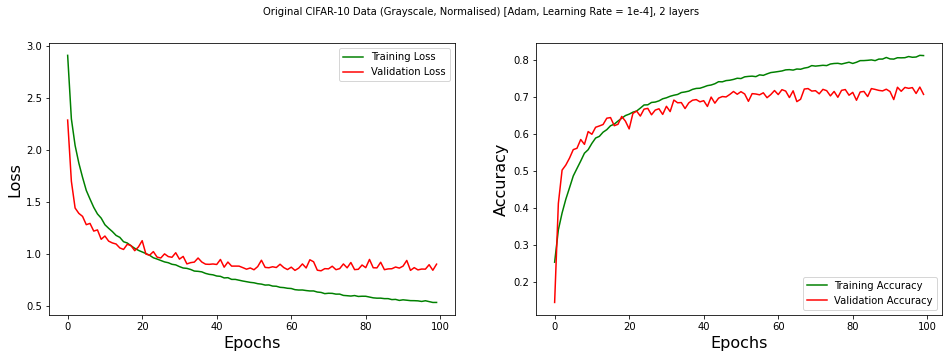

In [ ]:
plot_acc_loss(hist15,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-4], 2 layers')

In [ ]:
hist16 = History()
model16 = Sequential()

model16.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model16.add(BatchNormalization())
model16.add(MaxPooling2D(pool_size=2))
model16.add(Dropout(0.3))

model16.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model16.add(BatchNormalization())
model16.add(MaxPooling2D(pool_size=2))
model16.add(Dropout(0.4))

model16.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model16.add(BatchNormalization())
model16.add(MaxPooling2D(pool_size=2))
model16.add(Dropout(0.5))

model16.add(Conv2D(512, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model16.add(BatchNormalization())
model16.add(MaxPooling2D(pool_size=2))
model16.add(Dropout(0.5))

model16.add(Flatten())
model16.add(Dense(classes, activation='softmax'))
print(model16.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model16.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist16 = model16.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 8s 23ms/step - loss: 3.0582 - accuracy: 0.2680 - categorical_accuracy: 0.2680 - val_loss: 6.9848 - val_accuracy: 0.0984 - val_categorical_accuracy: 0.0984
Epoch 2/100
274/274 [==============================] - 6s 22ms/step - loss: 1.7730 - accuracy: 0.4422 - categorical_accuracy: 0.4422 - val_loss: 5.9712 - val_accuracy: 0.1282 - val_categorical_accuracy: 0.1282
Epoch 3/100
274/274 [==============================] - 6s 21ms/step - loss: 1.4203 - accuracy: 0.5307 - categorical_accuracy: 0.5307 - val_loss: 2.3716 - val_accuracy: 0.3463 - val_categorical_accuracy: 0.3463
Epoch 4/100
274/274 [==============================] - 6s 21ms/step - loss: 1.2093 - accuracy: 0.5888 - categorical_accuracy: 0.5888 - val_loss: 0.9972 - val_accuracy: 0.6541 - val_categorical_accuracy: 0.6541
Epoch 5/100
274/274 [==============================] - 6s 21ms/step - loss: 1.1069 - accuracy: 0.6211 - categorical_accuracy: 0.6211 - val_loss: 1.3052 - val_ac

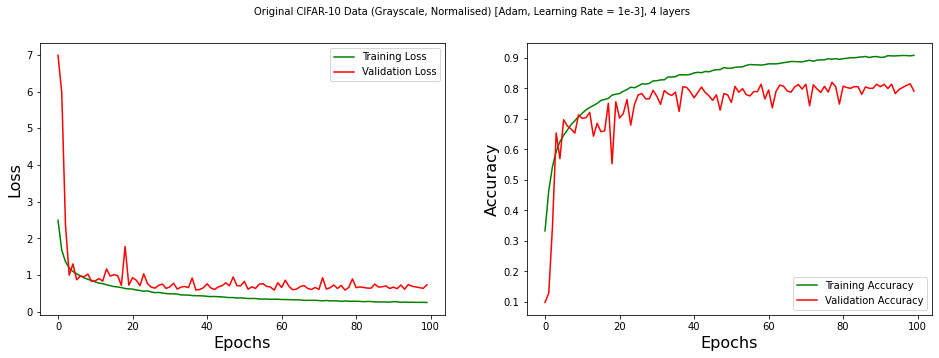

In [ ]:
plot_acc_loss(hist16,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3], 4 layers')

In [ ]:
hist17 = History()
model17 = Sequential()

model17.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model17.add(BatchNormalization())
model17.add(MaxPooling2D(pool_size=2))
model17.add(Dropout(0.3))

model17.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model17.add(BatchNormalization())
model17.add(MaxPooling2D(pool_size=2))
model17.add(Dropout(0.4))

model17.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model17.add(BatchNormalization())
model17.add(MaxPooling2D(pool_size=2))
model17.add(Dropout(0.5))

model17.add(Conv2D(512, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model17.add(BatchNormalization())
model17.add(MaxPooling2D(pool_size=2))
model17.add(Dropout(0.5))

model17.add(Flatten())
model17.add(Dense(classes, activation='softmax'))
print(model17.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model17.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist17 = model17.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 8s 23ms/step - loss: 3.8120 - accuracy: 0.1830 - categorical_accuracy: 0.1830 - val_loss: 3.0126 - val_accuracy: 0.0984 - val_categorical_accuracy: 0.0984
Epoch 2/100
274/274 [==============================] - 6s 22ms/step - loss: 2.7239 - accuracy: 0.2898 - categorical_accuracy: 0.2898 - val_loss: 2.3708 - val_accuracy: 0.1325 - val_categorical_accuracy: 0.1325
Epoch 3/100
274/274 [==============================] - 6s 21ms/step - loss: 2.4017 - accuracy: 0.3321 - categorical_accuracy: 0.3321 - val_loss: 1.7529 - val_accuracy: 0.3609 - val_categorical_accuracy: 0.3609
Epoch 4/100
274/274 [==============================] - 6s 21ms/step - loss: 2.1760 - accuracy: 0.3676 - categorical_accuracy: 0.3676 - val_loss: 1.6642 - val_accuracy: 0.4071 - val_categorical_accuracy: 0.4071
Epoch 5/100
274/274 [==============================] - 6s 23ms/step - loss: 2.0240 - accuracy: 0.4003 - categorical_accuracy: 0.4003 - val_loss: 1.5743 - val_ac

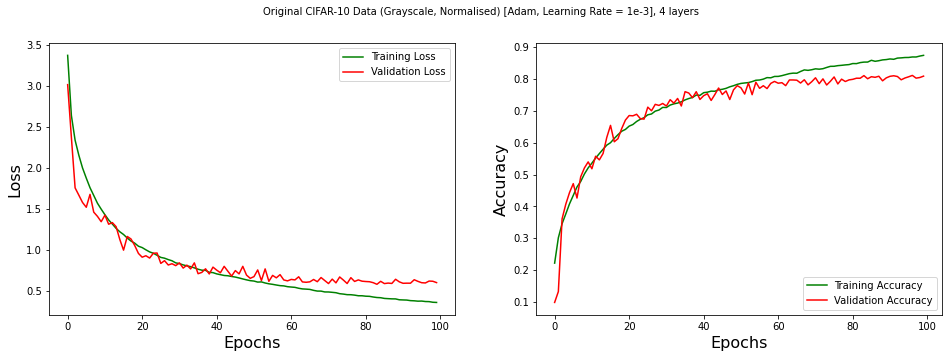

In [ ]:
plot_acc_loss(hist17,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3], 4 layers')

In [ ]:
hist18 = History()
model18 = Sequential()

model18.add(Conv2D(16, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model18.add(BatchNormalization())
model18.add(MaxPooling2D(pool_size=2))
model18.add(Dropout(0.3))

model18.add(Conv2D(32, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model18.add(BatchNormalization())
model18.add(MaxPooling2D(pool_size=2))
model18.add(Dropout(0.4))

model18.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model18.add(BatchNormalization())
model18.add(MaxPooling2D(pool_size=2))
model18.add(Dropout(0.5))

model18.add(Flatten())
model18.add(Dense(classes, activation='softmax'))
print(model18.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [ ]:
model18.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist18 = model18.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 35s 11ms/step - loss: 3.2085 - accuracy: 0.2091 - categorical_accuracy: 0.2091 - val_loss: 2.6243 - val_accuracy: 0.1029 - val_categorical_accuracy: 0.1029
Epoch 2/100
274/274 [==============================] - 2s 7ms/step - loss: 1.8974 - accuracy: 0.3600 - categorical_accuracy: 0.3600 - val_loss: 2.6683 - val_accuracy: 0.1499 - val_categorical_accuracy: 0.1499
Epoch 3/100
274/274 [==============================] - 2s 8ms/step - loss: 1.6561 - accuracy: 0.4221 - categorical_accuracy: 0.4221 - val_loss: 1.9822 - val_accuracy: 0.2810 - val_categorical_accuracy: 0.2810
Epoch 4/100
274/274 [==============================] - 2s 8ms/step - loss: 1.4932 - accuracy: 0.4707 - categorical_accuracy: 0.4707 - val_loss: 1.3342 - val_accuracy: 0.5299 - val_categorical_accuracy: 0.5299
Epoch 5/100
274/274 [==============================] - 2s 8ms/step - loss: 1.3963 - accuracy: 0.5091 - categorical_accuracy: 0.5091 - val_loss: 1.5827 - val_accur

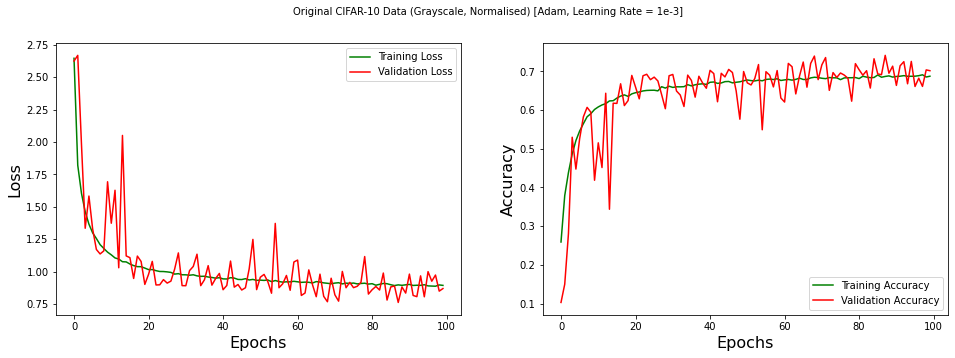

In [ ]:
plot_acc_loss(hist18,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3]')

In [ ]:
hist19 = History()
model19 = Sequential()

model19.add(Conv2D(2, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model19.add(BatchNormalization())
model19.add(MaxPooling2D(pool_size=2))
model19.add(Dropout(0.3))

model19.add(Conv2D(4, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model19.add(BatchNormalization())
model19.add(MaxPooling2D(pool_size=2))
model19.add(Dropout(0.4))

model19.add(Conv2D(8, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model19.add(BatchNormalization())
model19.add(MaxPooling2D(pool_size=2))
model19.add(Dropout(0.5))

model19.add(Flatten())
model19.add(Dense(classes, activation='softmax'))
print(model19.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 2)         20        
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 2)         8         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 2)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 2)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 4)         76        
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 4)         16        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 4)          

In [ ]:
model19.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist19 = model19.fit(xtrain_, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 4s 9ms/step - loss: 3.5876 - accuracy: 0.1296 - categorical_accuracy: 0.1296 - val_loss: 2.3135 - val_accuracy: 0.1571 - val_categorical_accuracy: 0.1571
Epoch 2/100
274/274 [==============================] - 2s 5ms/step - loss: 2.2655 - accuracy: 0.2158 - categorical_accuracy: 0.2158 - val_loss: 2.1800 - val_accuracy: 0.2179 - val_categorical_accuracy: 0.2179
Epoch 3/100
274/274 [==============================] - 2s 6ms/step - loss: 2.0451 - accuracy: 0.2674 - categorical_accuracy: 0.2674 - val_loss: 1.9730 - val_accuracy: 0.2956 - val_categorical_accuracy: 0.2956
Epoch 4/100
274/274 [==============================] - 2s 6ms/step - loss: 1.9959 - accuracy: 0.2866 - categorical_accuracy: 0.2866 - val_loss: 2.0169 - val_accuracy: 0.2831 - val_categorical_accuracy: 0.2831
Epoch 5/100
274/274 [==============================] - 2s 6ms/step - loss: 1.9675 - accuracy: 0.2947 - categorical_accuracy: 0.2947 - val_loss: 1.9762 - val_accurac

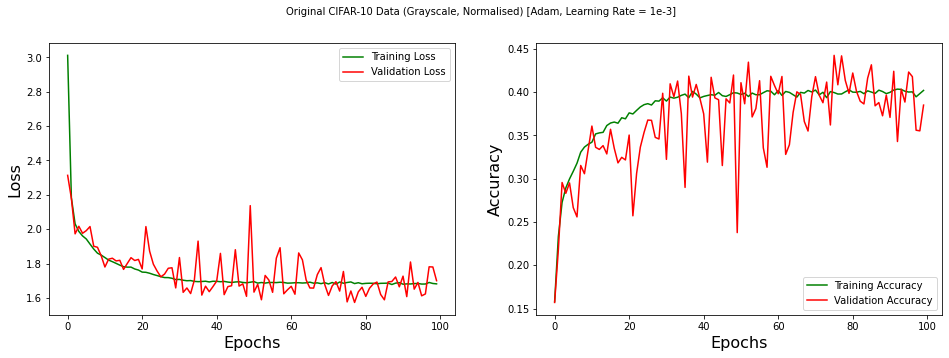

In [ ]:
plot_acc_loss(hist19,'Original CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3]')

In [ ]:
# Add some gaussian blur to images
def augment_data(img,k=11,k2=11,sigma=0.5):
    import cv2
    smooth_img = cv2.GaussianBlur(img, (k,k2), sigma)
    return smooth_img

In [ ]:
# convolve augmentation
# calculates the horizontal gradient of images using some simple finite kernel [-1, 0, 1]
from scipy.signal import convolve2d
def augment_data2(img):
  # first add the gaussian blur to smooth the images
  img2 = augment_data(img)
  # then convolve
  horz_grad = convolve2d(img2, [[-1, 0, 1]], mode='same')
  return horz_grad

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=2,
    horizontal_flip=True,
    zca_whitening=True)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
aug_imgs = []
# Iterate through the images
for i in range(0,xtrain_.shape[0]):
  # Call the function
  aug_img = augment_data2(xtrain_[i])
  
  # Append into the lists
  aug_imgs.append(aug_img)

# Turn into np arrays
aug_imgs = np.array(aug_imgs)

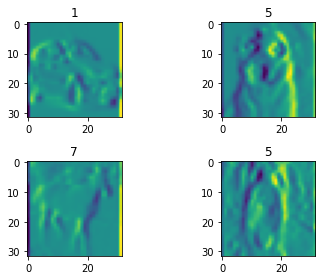

In [ ]:
visualise_data(aug_imgs,y_train)

In [ ]:
aug_imgs = aug_imgs.reshape(50000,32,32,1)

In [ ]:
datagen.fit(aug_imgs)

In [ ]:
model20 = Sequential()

model20.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(1e-4)))
model20.add(BatchNormalization())
model20.add(MaxPooling2D(pool_size=2))
model20.add(Dropout(0.5))

model20.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(1e-4)))
model20.add(BatchNormalization())
model20.add(MaxPooling2D(pool_size=2))
model20.add(Dropout(0.5))

model20.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(1e-4)))
model20.add(BatchNormalization())
model20.add(MaxPooling2D(pool_size=2))
model20.add(Dropout(0.5))

model20.add(Flatten())
model20.add(Dense(classes, activation='softmax'))
print(model20.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model20.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist20 = model20.fit(aug_imgs, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 6s 19ms/step - loss: 3.2585 - accuracy: 0.2654 - categorical_accuracy: 0.2654 - val_loss: 7.9860 - val_accuracy: 0.0983 - val_categorical_accuracy: 0.0983
Epoch 2/100
274/274 [==============================] - 5s 19ms/step - loss: 1.9016 - accuracy: 0.4503 - categorical_accuracy: 0.4503 - val_loss: 6.4712 - val_accuracy: 0.1245 - val_categorical_accuracy: 0.1245
Epoch 3/100
274/274 [==============================] - 5s 17ms/step - loss: 1.5640 - accuracy: 0.5123 - categorical_accuracy: 0.5123 - val_loss: 2.4232 - val_accuracy: 0.3355 - val_categorical_accuracy: 0.3355
Epoch 4/100
274/274 [==============================] - 5s 17ms/step - loss: 1.4409 - accuracy: 0.5477 - categorical_accuracy: 0.5477 - val_loss: 1.6866 - val_accuracy: 0.4649 - val_categorical_accuracy: 0.4649
Epoch 5/100
274/274 [==============================] - 5s 19ms/step - loss: 1.3109 - accuracy: 0.5792 - categorical_accuracy: 0.5792 - val_loss: 1.3591 - val_ac

In [ ]:
plot_acc_loss(hist20,'Aug CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3]')

In [ ]:
model21 = Sequential()

model21.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model21.add(BatchNormalization())
model21.add(MaxPooling2D(pool_size=2))
model21.add(Dropout(0.3))

model21.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model21.add(BatchNormalization())
model21.add(MaxPooling2D(pool_size=2))
model21.add(Dropout(0.4))

model21.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same'))
model21.add(BatchNormalization())
model21.add(MaxPooling2D(pool_size=2))
model21.add(Dropout(0.5))

model21.add(Flatten())
model21.add(Dense(classes, activation='softmax'))
print(model21.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
model21.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist21 = model21.fit(aug_imgs, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 5s 20ms/step - loss: 1.9763 - accuracy: 0.4305 - categorical_accuracy: 0.4305 - val_loss: 1.7874 - val_accuracy: 0.4073 - val_categorical_accuracy: 0.4073
Epoch 2/100
274/274 [==============================] - 5s 17ms/step - loss: 1.8237 - accuracy: 0.4606 - categorical_accuracy: 0.4606 - val_loss: 1.6491 - val_accuracy: 0.4530 - val_categorical_accuracy: 0.4530
Epoch 3/100
274/274 [==============================] - 5s 17ms/step - loss: 1.7265 - accuracy: 0.4816 - categorical_accuracy: 0.4816 - val_loss: 1.6194 - val_accuracy: 0.4580 - val_categorical_accuracy: 0.4580
Epoch 4/100
274/274 [==============================] - 5s 19ms/step - loss: 1.6365 - accuracy: 0.4953 - categorical_accuracy: 0.4953 - val_loss: 1.5495 - val_accuracy: 0.4786 - val_categorical_accuracy: 0.4786
Epoch 5/100
274/274 [==============================] - 5s 17ms/step - loss: 1.5625 - accuracy: 0.5117 - categorical_accuracy: 0.5117 - val_loss: 1.3982 - val_ac

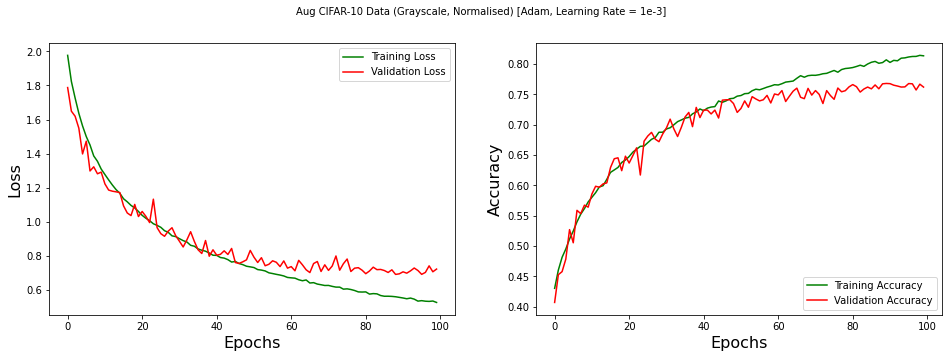

In [ ]:
plot_acc_loss(hist21,'Aug CIFAR-10 Data (Grayscale, Normalised) [Adam, Learning Rate = 1e-3]')

In [ ]:
model22 = Sequential()

model22.add(Conv2D(64, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model22.add(BatchNormalization())
model22.add(MaxPooling2D(pool_size=2))
model22.add(Dropout(0.3))

model22.add(Conv2D(128, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model22.add(BatchNormalization())
model22.add(MaxPooling2D(pool_size=2))
model22.add(Dropout(0.4))

model22.add(Conv2D(264, kernel_size=3, input_shape=input_shape, activation ="relu",padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model22.add(BatchNormalization())
model22.add(MaxPooling2D(pool_size=2))
model22.add(Dropout(0.5))

model22.add(Flatten())
model22.add(Dense(classes, activation='softmax'))
print(model22.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)        

In [ ]:
model22.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-3), metrics=['accuracy','CategoricalAccuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist22 = model22.fit(aug_imgs, enc_ytrain,batch_size=128,epochs=100,validation_split=0.3,shuffle=True)

Epoch 1/100
274/274 [==============================] - 7s 22ms/step - loss: 5.4552 - accuracy: 0.3014 - categorical_accuracy: 0.3014 - val_loss: 8.8875 - val_accuracy: 0.0983 - val_categorical_accuracy: 0.0983
Epoch 2/100
274/274 [==============================] - 5s 20ms/step - loss: 3.0324 - accuracy: 0.4924 - categorical_accuracy: 0.4924 - val_loss: 5.4726 - val_accuracy: 0.1023 - val_categorical_accuracy: 0.1023
Epoch 3/100
274/274 [==============================] - 5s 20ms/step - loss: 2.2401 - accuracy: 0.5486 - categorical_accuracy: 0.5486 - val_loss: 2.0258 - val_accuracy: 0.5211 - val_categorical_accuracy: 0.5211
Epoch 4/100
274/274 [==============================] - 5s 18ms/step - loss: 1.9395 - accuracy: 0.5774 - categorical_accuracy: 0.5774 - val_loss: 1.6773 - val_accuracy: 0.6215 - val_categorical_accuracy: 0.6215
Epoch 5/100
274/274 [==============================] - 5s 20ms/step - loss: 1.8238 - accuracy: 0.5873 - categorical_accuracy: 0.5873 - val_loss: 1.7246 - val_ac

KeyboardInterrupt: ignored